In [1]:
import sys
import scanpy as sc
import scvelo as scv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo')  # for beautified visualization

Filtered out 25073 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 16/64 cores)


  0%|          | 0/814 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


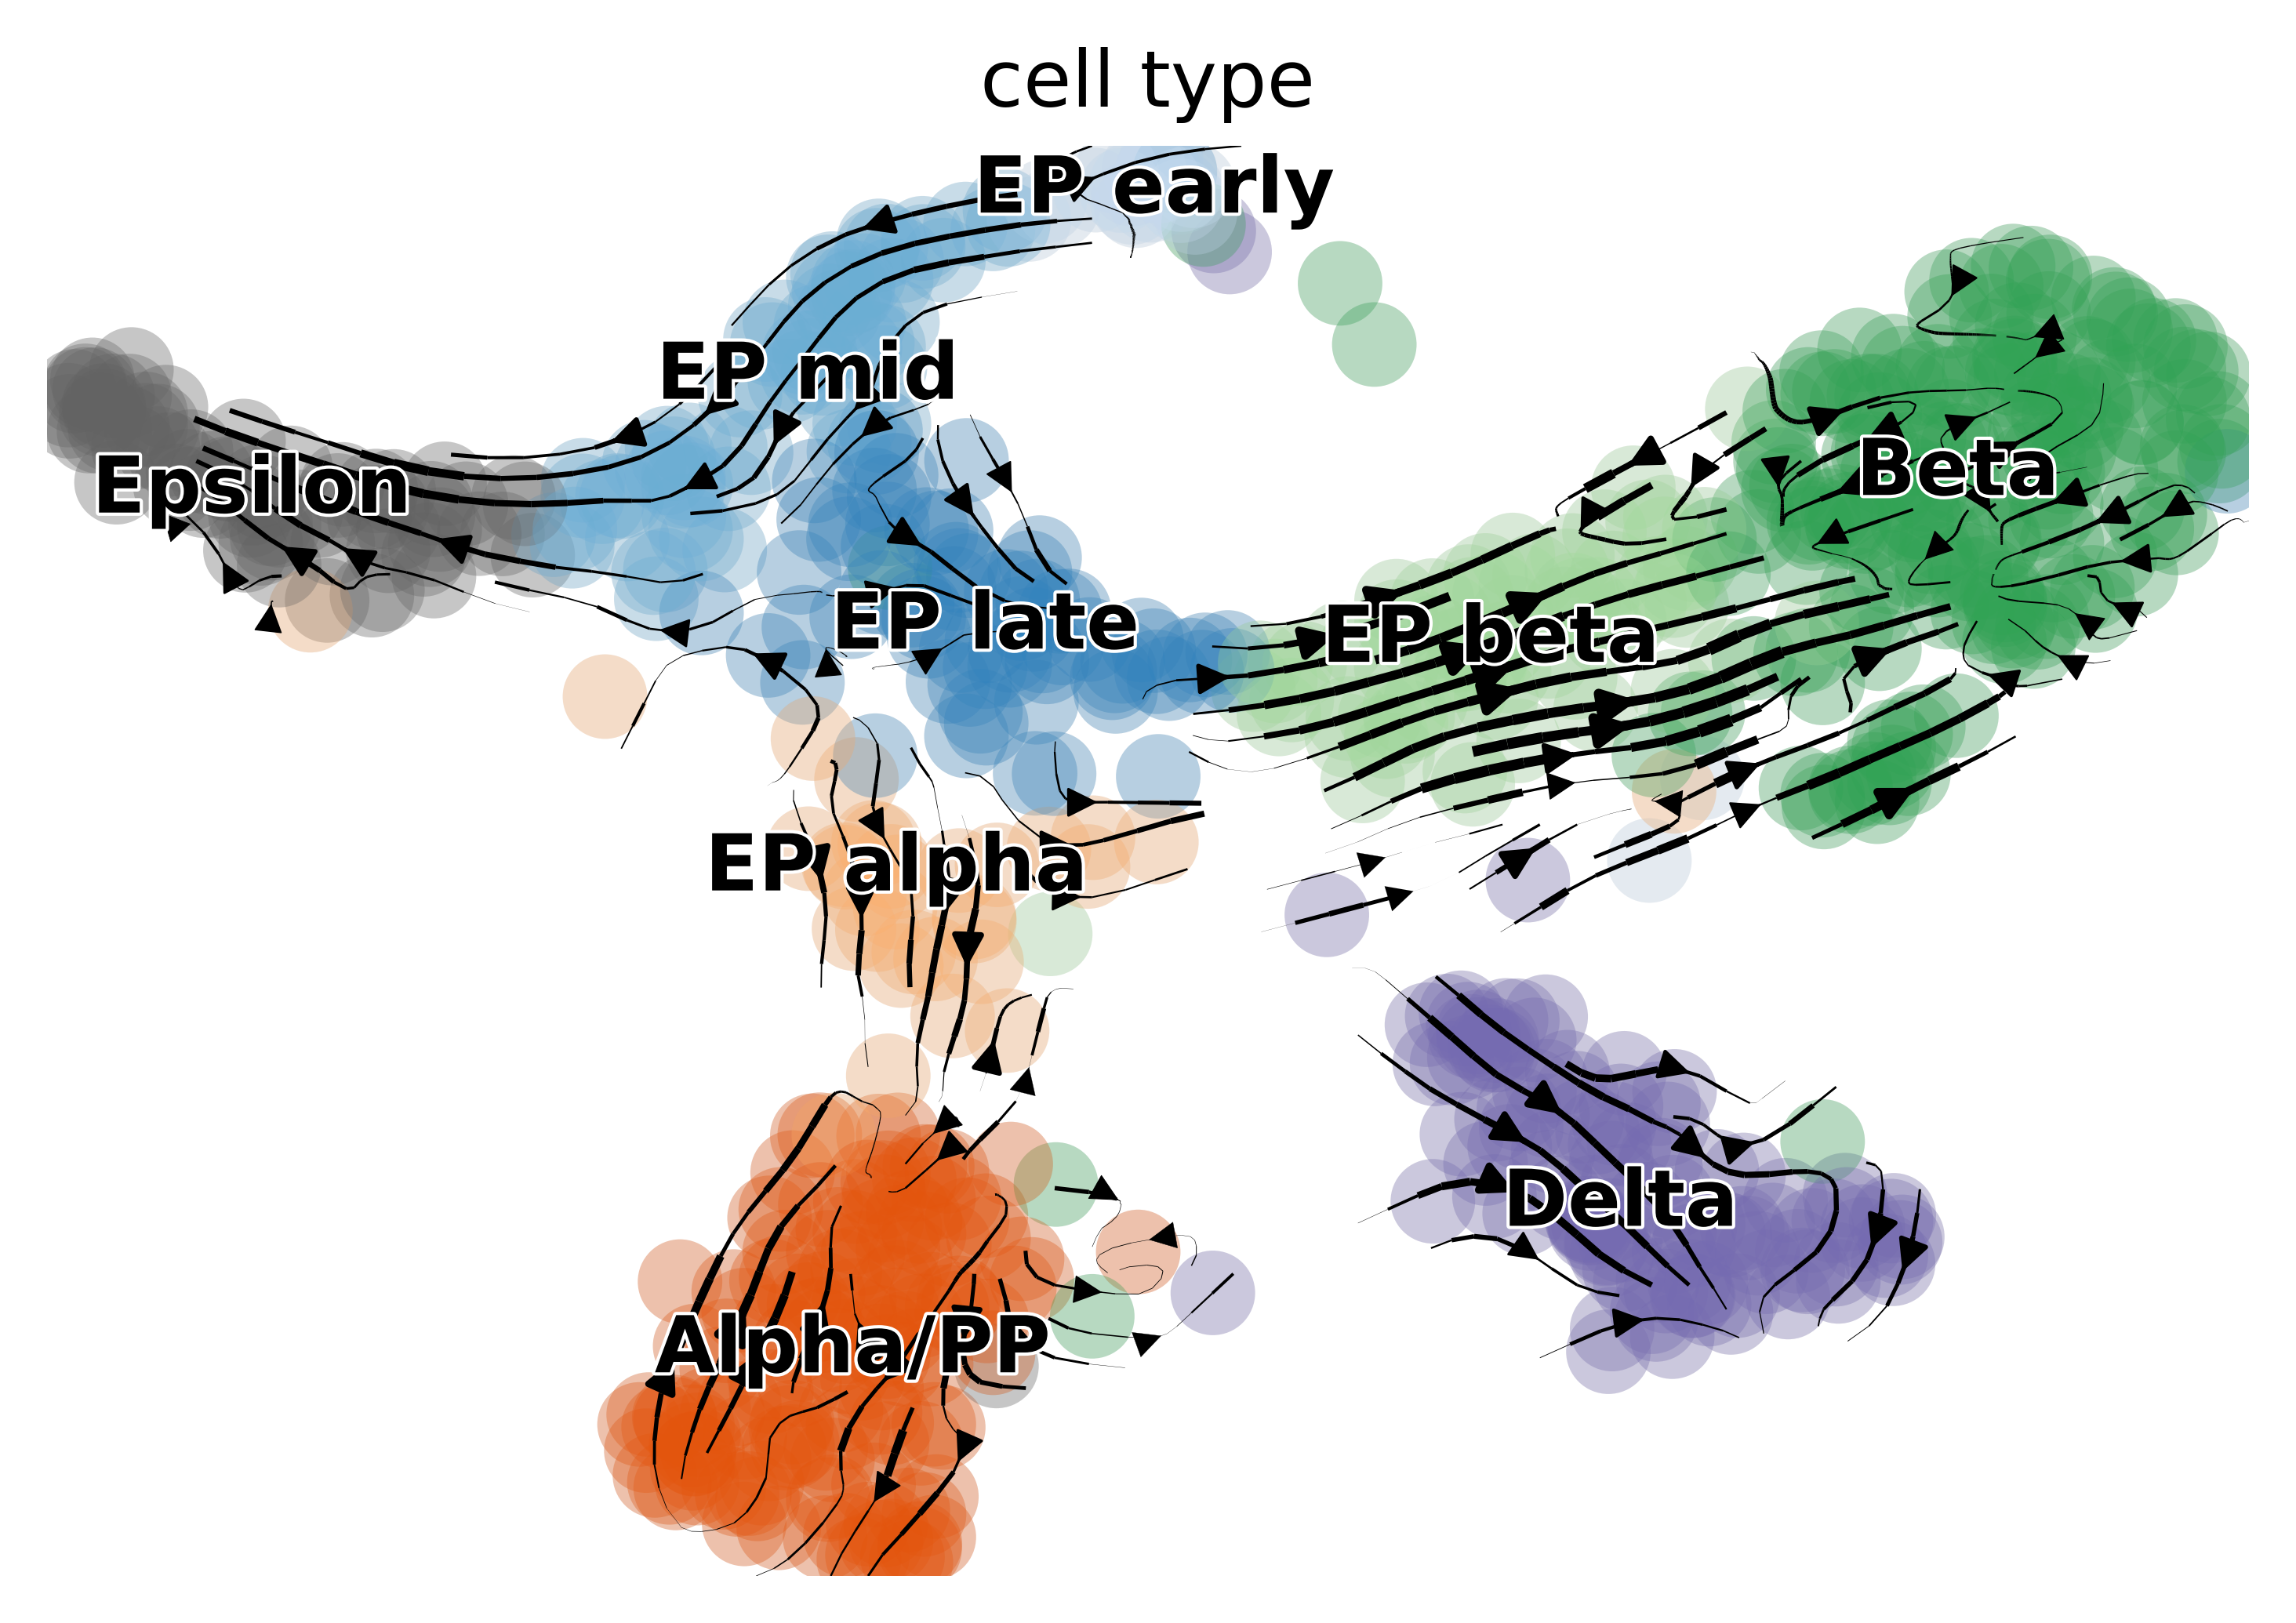

In [5]:
adata = scv.read("/home/mazhuo/Rproject/fetal_panc/EP.h5ad")
adata
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
scv.tl.velocity(adata, mode="stochastic")
scv.tl.velocity_graph(adata, n_jobs=16)
scv.pl.velocity_embedding_stream(adata, basis='umap',color="cell_type",
                                 groups=["EP early","EP mid","EP late","EP alpha","Alpha/PP","Epsilon","EP beta","Beta","Delta"],
                                 dpi=300,palette=["#c6dbef","#6baed6","#3182bd","#fdae6b","#e6550d","#636363","#a1d99b","#31a354","#756bb1"])